# StatTutor Lab: Analyzing Data From a Course's Grade Book

At the end of the semester, an "Introduction to Statistics" instructor wanted to gain insight into his students' performance by analyzing gradebook data. The instructor taught 3 large lecture sections offered at different times during the day. Since each section, depending on the time it was taught, attracted different types of students (in terms of major, age, full-time/part-time, etc.) the instructor chose a random sample of 35 students from each section to insure proper representation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

In [2]:
grades = pd.read_excel('gradebook.xls')

**Midterm1**: Student's score on the first midterm (0-100 scale)  
**Midterm2**: Student's score on the second midterm (0-100 scale)  
**Diff.Mid**: The difference between the two midterm exam scores (midterm1 - midterm2)  
**Extra** credit: Did the student turn in the extra credit assignment? (0=NO, 1=YES)  
**Final**: Student's score on the final (0-100 scale)  
**Class**: Student's class (1=Freshman, 2=Sophomore, 3=Junior, 4=Senior)  

In [3]:
grades.head()

,Midterm1,Midterm2,Diff.Mid,Extra_Credit,Final,Class
0,83,77,6,1,81,4
1,72,77,-5,0,76,1
2,71,63,8,1,77,2
3,74,77,-3,0,70,1
4,94,85,9,1,93,2


In [4]:
grades.describe()

,Midterm1,Midterm2,Diff.Mid,Extra_Credit,Final,Class
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,78.228571,77.819048,0.409524,0.371429,77.657143,1.971429
std,8.258163,9.774162,5.020526,0.485504,7.300986,1.078257
min,63.000000,57.000000,-11.000000,0.000000,63.000000,1.000000
25%,72.000000,71.000000,-3.000000,0.000000,73.000000,1.000000
50%,78.000000,78.000000,0.000000,0.000000,76.000000,2.000000
75%,82.000000,85.000000,4.000000,1.000000,82.000000,3.000000
max,94.000000,100.000000,14.000000,1.000000,94.000000,4.000000


In [5]:
grades.dtypes

Midterm1        int64
Midterm2        int64
Diff.Mid        int64
Extra_Credit    int64
Final           int64
Class           int64
dtype: object

In [6]:
grades.isna().sum()

Midterm1        0
Midterm2        0
Diff.Mid        0
Extra_Credit    0
Final           0
Class           0
dtype: int64

# Check the data

## Out of the first ten students in the datafile, how many students turned in the extra credit?

In [7]:
grades[:10].loc[grades['Extra_Credit'] > 0]

,Midterm1,Midterm2,Diff.Mid,Extra_Credit,Final,Class
0,83,77,6,1,81,4
2,71,63,8,1,77,2
4,94,85,9,1,93,2
6,92,99,-7,1,87,1
8,92,90,2,1,87,1
9,81,84,-3,1,78,1


## Out of the first ten students in the datafile, how many students did better on the first midterm than the second midterm?

In [8]:
grades[:10].loc[grades['Midterm1'] > grades['Midterm2']]

,Midterm1,Midterm2,Diff.Mid,Extra_Credit,Final,Class
0,83,77,6,1,81,4
2,71,63,8,1,77,2
4,94,85,9,1,93,2
7,74,72,2,0,73,1
8,92,90,2,1,87,1


## What is the final score of the first junior in the datafile who did not turn in the extra credit?

In [10]:
grades.loc[(grades['Class'] == 3) & (grades['Extra_Credit'] == 0)].iloc[0]

Midterm1        82
Midterm2        81
Diff.Mid         1
Extra_Credit     0
Final           82
Class            3
Name: 33, dtype: int64

# Questions

### Do the data provide evidence that the students who did not do the extra credit assignment (group 1) performed significantly worse on the final than those who did (group 2)?

In [18]:
extra = grades.loc[grades.Extra_Credit == 1, 'Final'].reset_index(drop=True)
no_extra = grades.loc[grades.Extra_Credit == 0, 'Final'].reset_index(drop=True)

In [24]:
grades_extra = pd.DataFrame({'extra': extra, 'no_extra': no_extra})

In [27]:
grades_extra.describe()

,extra,no_extra
count,39.000000,66.000000
mean,84.076923,73.863636
std,6.250830,4.806682
min,75.000000,63.000000
25%,78.000000,70.000000
50%,82.000000,74.500000
75%,88.000000,76.000000
max,94.000000,83.000000


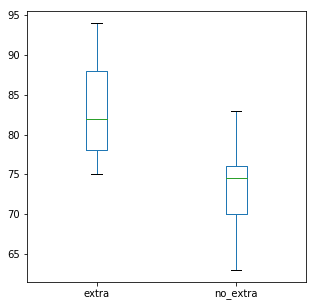

In [26]:
grades_extra.plot.box(figsize=(5, 5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1153a1da0>,
      dtype=object)

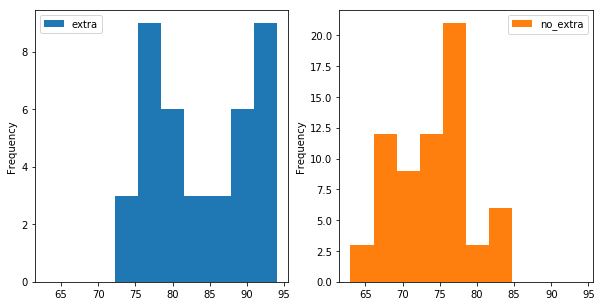

In [28]:
grades_extra.plot.hist(subplots=True, 
                       layout=(1, 2), 
                       figsize=(10, 5))

T-test for two independent samples, compare means between students that did the extra assignment. The sample is random, and does not appear to contain any outliers or strong skew, the test can proceed.

### Ttest for two independent samples

Ho: u1 - u2 = 0  
Ha: u1 - u2 < 0  
**one sided**  
Did the students that did not do the extra (u1) performed worse in the finals than the ones that did (u2)?

In [29]:
st.ttest_ind(no_extra, extra)

Ttest_indResult(statistic=-9.390948257656724, pvalue=1.6728454110079457e-15)

using another library

In [30]:
from statsmodels.stats.weightstats import ttest_ind

In [31]:
ttest_ind(no_extra, extra, alternative='smaller')

(-9.390948257656726, 8.364227055039729e-16, 103.0)

divide second p-value by two because it calculated two tailed p-value

In [33]:
8.364227055039729e-16 == (1.6728454110079457e-15/2)

True

The test statistic is very high, and p-value is very low, such a difference of means is almost impossible considering the null hypothesis that the means are equal. Considering the 5% significance test, we have very strong evidence to reject the null hypothesis and conclude that the students who did the extra, did perform better than those who didn't.

We can't make causational conclusions because this is an obvservational study, there might be other lurking variables involved, maybe the students that do the extra assigments are in general more applied.

## The material covered by the second midterm is harder than the material covered in the first. Is this reflected by the students' grades?

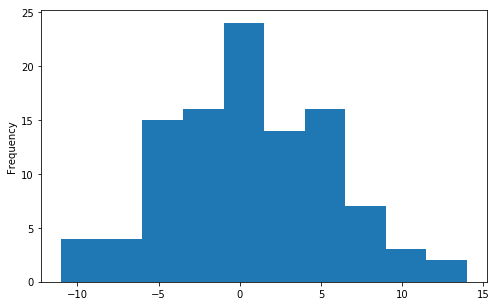

In [34]:
grades['Diff.Mid'].plot.hist(figsize=(8, 5))

In [35]:
grades['Diff.Mid'].describe()

count    105.000000
mean       0.409524
std        5.020526
min      -11.000000
25%       -3.000000
50%        0.000000
75%        4.000000
max       14.000000
Name: Diff.Mid, dtype: float64

### Test for two dependent variables

Ho: ud = 0  
Ha: ud > 0  
**one sided test**  
where ud is the mean of differences (mid1 - mid2).

In [37]:
mid1 = grades['Midterm1']
mid2 = grades['Midterm2']
t, p = st.ttest_rel(mid1, mid2)

In [38]:
print(f'statistic: {t}, p-value: {p/2}')

statistic: 0.8358428217341289, p-value: 0.20257978768946333


The statitic and p-value indicate that the test is not significant, and in the 5% significance test we cannot reject Ho and conclude that scores on Mid2 are in general lower.

## Do the data provide evidence for a significant "class effect" on final performance?

### Comparison of many indepentent sample means with ANOVA

Ho: u1 = u2 = u3 = u4  
Ha: not all means are equal  
where u1=Freshman, u2=Sophomore, u3=Junior, u4=Senior

In [50]:
class1 = grades.loc[grades.Class == 1, 'Final'].reset_index(drop=True)
class2 = grades.loc[grades.Class == 2, 'Final'].reset_index(drop=True)
class3 = grades.loc[grades.Class == 3, 'Final'].reset_index(drop=True)
class4 = grades.loc[grades.Class == 4, 'Final'].reset_index(drop=True)

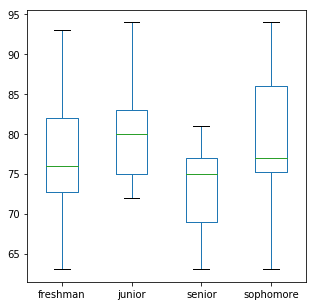

In [51]:
grade_class = pd.DataFrame({'freshman': class1,
                            'sophomore': class2,
                            'junior': class3,
                            'senior': class4})
grade_class.plot.box(figsize=(5, 5))

In [52]:
grade_class.describe()

,freshman,junior,senior,sophomore
count,48.000000,17.000000,14.000000,26.000000
mean,77.270833,80.529412,73.428571,78.769231
std,6.912030,7.400318,5.905855,7.845038
min,63.000000,72.000000,63.000000,63.000000
25%,72.750000,75.000000,69.000000,75.250000
50%,76.000000,80.000000,75.000000,77.000000
75%,82.000000,83.000000,77.000000,86.000000
max,93.000000,94.000000,81.000000,94.000000


The boxplot show some overlap between medians, the means also are very similar, is this difference significant?

In [54]:
t, p = st.f_oneway(class1, class2, class3, class4)
print(f'statistic: {t}, p-value: {p}')

statistic: 2.830258281660388, p-value: 0.04219411983941741


The result is significant, particularly in the 5% significance test, we do have strong evidence against Ho and can conclude that the means between different classes differs.